## House Price Prediction - Advanced regression Assignment 
### ------------------------------------------------------------------------------------------------------ 

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observation and inference

In [1]:
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

### Importing and Understanding Data

In [3]:
# Reading and inspecting the dataframe

h_data = pd.read_csv("train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
#inspecting the dataframe
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [6]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [9]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Data Preparation (Encoding Categorical Variables, Handling Null Values)


### Imputing Null Values

In [13]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [14]:
## Treating the NaN Values
h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [15]:
## Dropping the LotFontgage columns as it have more Null values
h_data.drop("LotFrontage",axis = 1, inplace=True)

In [16]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [17]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')


In [18]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)

## Performing EDA


### Univariate and Bivariate Analysis

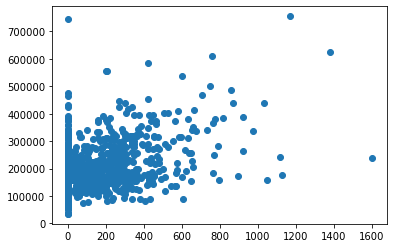

In [20]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

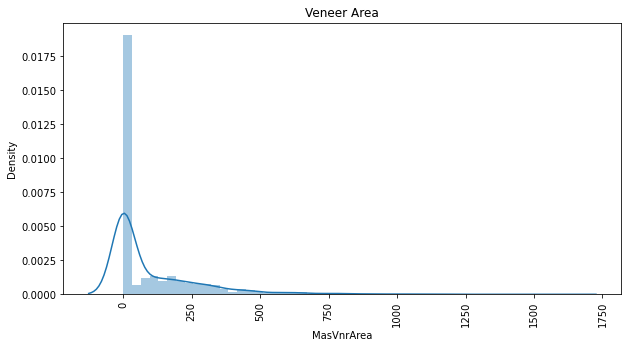

In [21]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

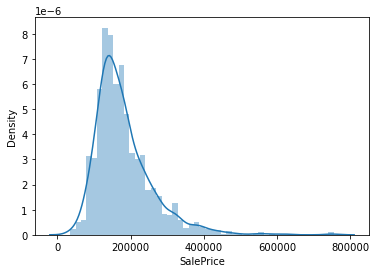

In [22]:
sns.distplot(h_data['SalePrice'])

In [23]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

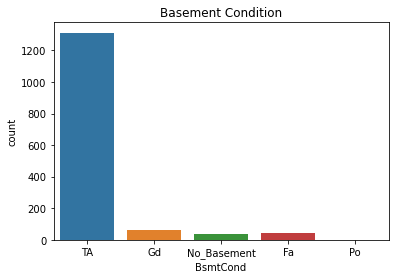

In [24]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

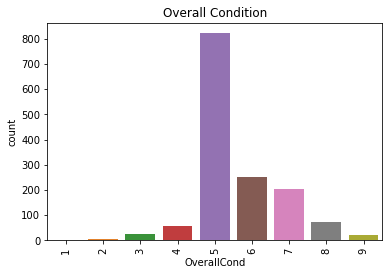

In [25]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

               5 is most overall condition

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

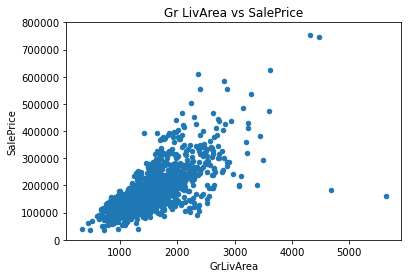

In [26]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

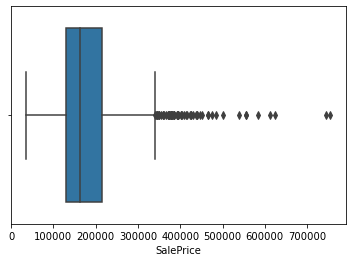

In [27]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

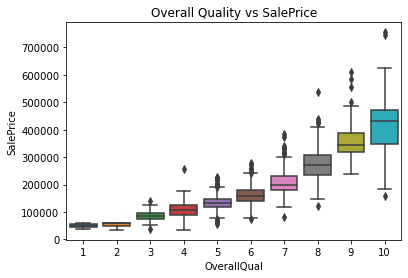

In [28]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

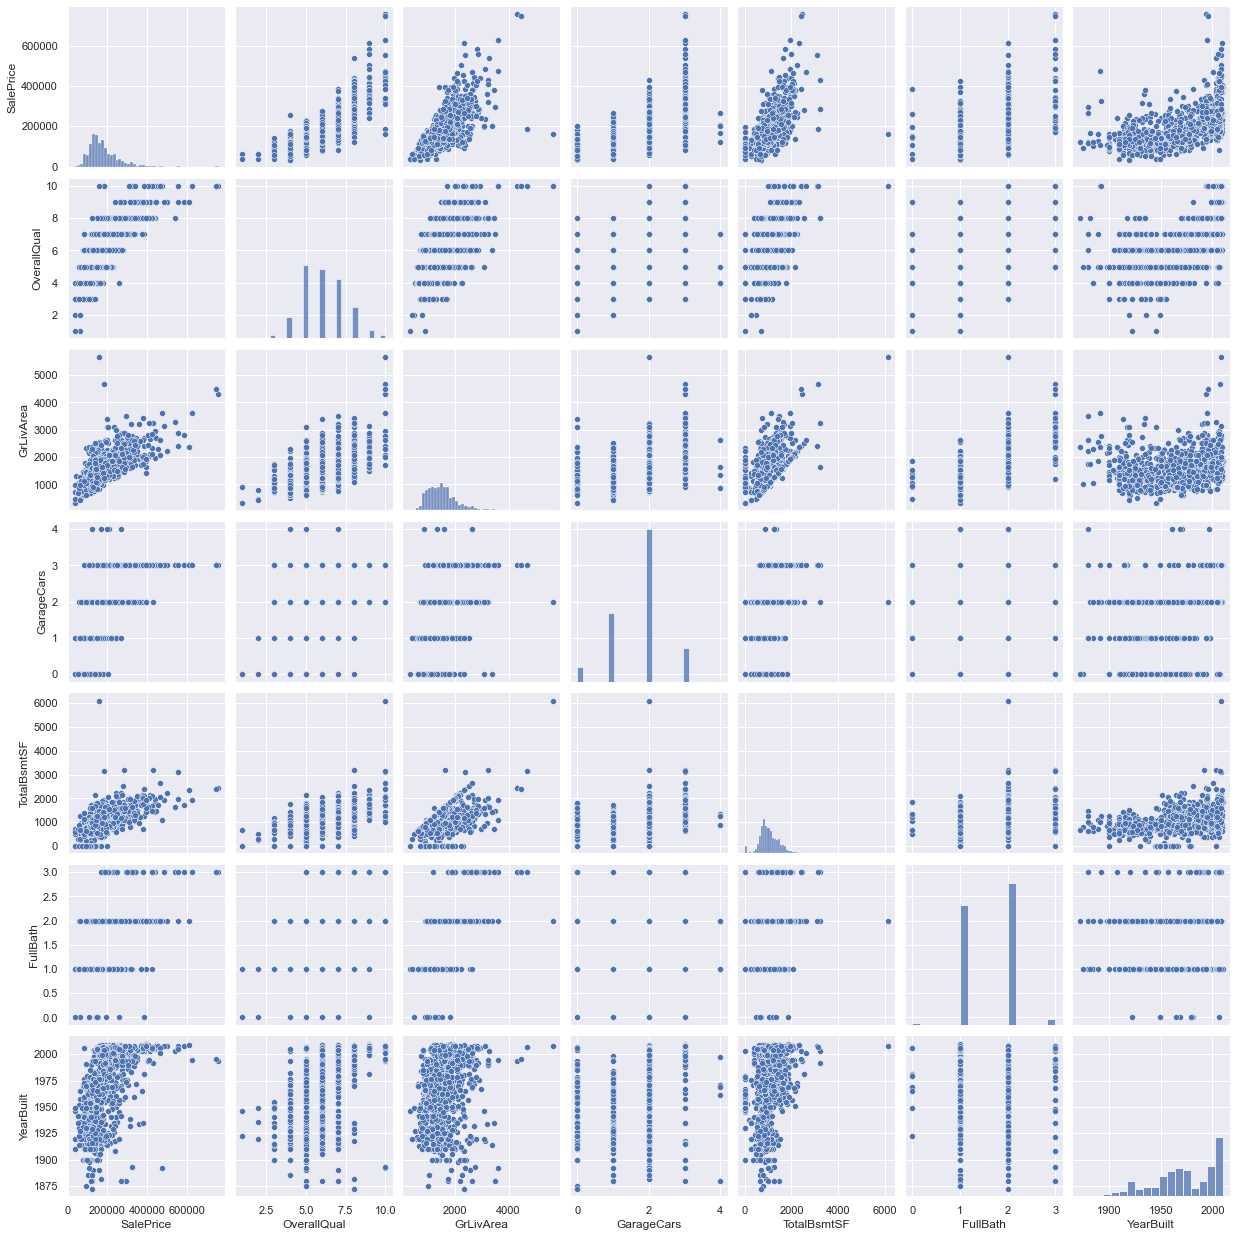

In [29]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

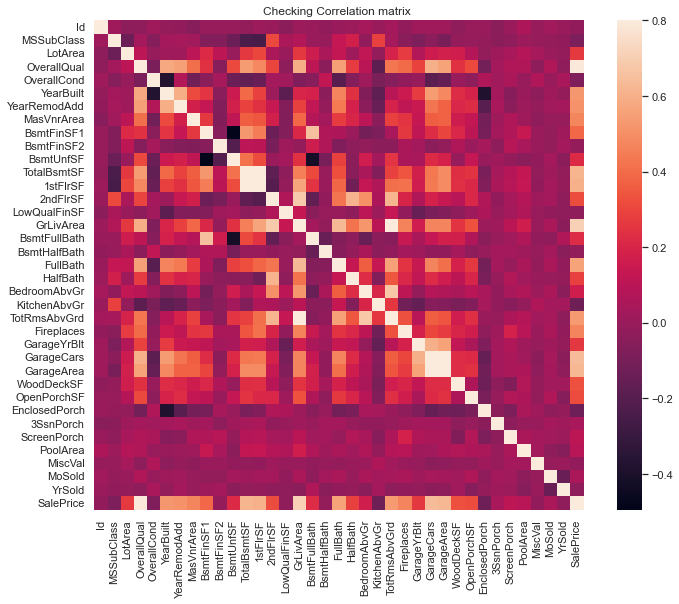

In [30]:
#checjing the correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

## Data Preperation 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

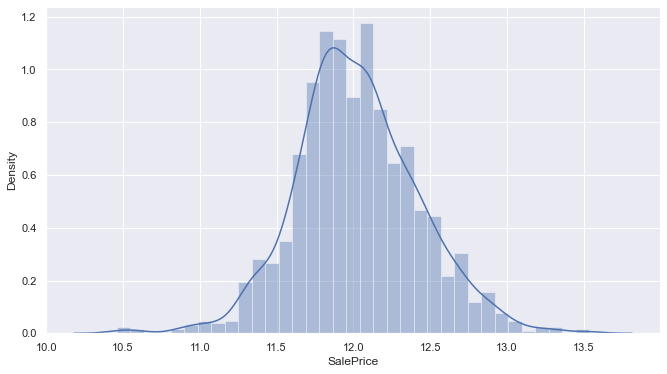

In [31]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

#### ```Deriving Variables```

In [32]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [34]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [35]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
## Droping the 'Id' column 
df = h_data.drop(['Id'],axis=1)

In [37]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [38]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [39]:
df.shape

(1460, 259)

# ```Train Test Split```

In [40]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [41]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [42]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [43]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## ```Model Building```

In [44]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [148]:
# Calculating the RFE
rfe = RFE(estimator=reg,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [149]:
col=X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'Functional_Sev', 'GarageType_No_Garage',
       'GarageCond_Fa', 'GarageCond_Po', 'PoolQC_Gd', 'SaleType_New'],
      dtype='object')

In [200]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     72.21
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.84e-172
Time:                        23:09:10   Log-Likelihood:                -63.518
No. Observations:                1021   AIC:                             167.0
Df Residuals:                    1001   BIC:                             265.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4423      0.211     54.324      0.000      11.029      11.856
TotalBsmtSF              0.2263      0.010     23.638      0.000       0.208       0.245
MSZoning_FV              0.8622      0.107      8.090      0.000       0.653       1.071
MSZoning_RH              0.6708      0.122      5.498      0.000       0.431       0.910
MSZoning_RL              0.7126      0.099      7.176      0.000       0.518       0.908
MSZoning_RM              0.5365      0.101      5.324      0.000       0.339       0.734
Condition2_PosN         -1.1574      0.264     -4.382      0.000      -1.676      -0.639
RoofMatl_CompShg        -0.0952      0.186     -0.512      0.609      -0.460       0.270
RoofMatl_Membran         0.0803      0.320      0.251      0.802      -0.547       0.708
RoofMatl_Tar&Grv         0.0670      0.222      0.302      0.763      -0.369       0.503
RoofMatl_WdShake         0.2212      0.227      0.975      0.330      -0.224       0.666
RoofMatl_WdShngl         0.2406      0.227      1.059      0.290      -0.205       0.687
Exterior1st_BrkComm     -0.6464      0.195     -3.308      0.001      -1.030      -0.263
Exterior1st_CBlock      -0.1943      0.130     -1.493      0.136      -0.450       0.061
Exterior2nd_CBlock      -0.1943      0.130     -1.493      0.136      -0.450       0.061
Functional_Sev          -0.4343      0.288     -1.510      0.131      -0.999       0.130
GarageType_No_Garage    -0.3178      0.036     -8.805      0.000      -0.389      -0.247
GarageCond_Fa           -0.2544      0.053     -4.768      0.000      -0.359      -0.150
GarageCond_Po           -0.2602      0.117     -2.227      0.026      -0.489      -0.031
PoolQC_Gd               -2.8621      0.336     -8.524      0.000      -3.521      -2.203
SaleType_New             0.2006      0.032      6.201      0.000       0.137       0.264
==============================================================================
Omnibus:                        6.641   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.566
Skew:                           0.194   Prob(JB):                       0.0375
Kurtosis:                       3.064   Cond. No.                     1.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [212]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,Exterior2nd_CBlock,inf
13,Exterior1st_CBlock,inf
0,const,669.76
4,MSZoning_RL,25.08
5,MSZoning_RM,19.64
7,RoofMatl_CompShg,9.04
2,MSZoning_FV,7.23
9,RoofMatl_Tar&Grv,4.35
11,RoofMatl_WdShngl,3.04
10,RoofMatl_WdShake,3.03


In [213]:
#Dropping column "RoofMatl_Membran" due to high p value of 0.8
X_train_new=X_train_new.drop("RoofMatl_Membran", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     76.29
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.14e-173
Time:                        23:09:12   Log-Likelihood:                -63.550
No. Observations:                1021   AIC:                             165.1
Df Residuals:                    1002   BIC:                             258.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4694      0.181     63.473      0.000      11.115      11.824
TotalBsmtSF              0.2264      0.010     23.661      0.000       0.208       0.245
MSZoning_FV              0.8622      0.107      8.093      0.000       0.653       1.071
MSZoning_RH              0.6708      0.122      5.501      0.000       0.432       0.910
MSZoning_RL              0.7126      0.099      7.179      0.000       0.518       0.907
MSZoning_RM              0.5366      0.101      5.327      0.000       0.339       0.734
Condition2_PosN         -1.1576      0.264     -4.385      0.000      -1.676      -0.640
RoofMatl_CompShg        -0.1223      0.151     -0.808      0.419      -0.419       0.175
RoofMatl_Tar&Grv         0.0400      0.194      0.206      0.837      -0.341       0.421
RoofMatl_WdShake         0.1940      0.199      0.973      0.331      -0.197       0.585
RoofMatl_WdShngl         0.2134      0.200      1.068      0.286      -0.179       0.605
Exterior1st_BrkComm     -0.6459      0.195     -3.307      0.001      -1.029      -0.263
Exterior1st_CBlock      -0.1943      0.130     -1.494      0.136      -0.450       0.061
Exterior2nd_CBlock      -0.1943      0.130     -1.494      0.136      -0.450       0.061
Functional_Sev          -0.4344      0.287     -1.511      0.131      -0.998       0.130
GarageType_No_Garage    -0.3178      0.036     -8.809      0.000      -0.389      -0.247
GarageCond_Fa           -0.2555      0.053     -4.806      0.000      -0.360      -0.151
GarageCond_Po           -0.2602      0.117     -2.228      0.026      -0.489      -0.031
PoolQC_Gd               -2.8897      0.317     -9.115      0.000      -3.512      -2.268
SaleType_New             0.2005      0.032      6.202      0.000       0.137       0.264
==============================================================================
Omnibus:                        6.638   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.564
Skew:                           0.194   Prob(JB):                       0.0375
Kurtosis:                       3.063   Cond. No.                     3.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [214]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,Exterior1st_CBlock,inf
13,Exterior2nd_CBlock,inf
0,const,493.38
4,MSZoning_RL,25.08
5,MSZoning_RM,19.64
2,MSZoning_FV,7.23
7,RoofMatl_CompShg,5.99
8,RoofMatl_Tar&Grv,3.33
3,MSZoning_RH,2.82
10,RoofMatl_WdShngl,2.35


In [215]:
#Dropping column "RoofMatl_CompShg" as it has high p value and vif is above 5
X_train_new=X_train_new.drop("RoofMatl_CompShg", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     80.77
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          3.24e-174
Time:                        23:09:17   Log-Likelihood:                -63.882
No. Observations:                1021   AIC:                             163.8
Df Residuals:                    1003   BIC:                             252.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3472      0.099    114.738      0.000      11.153      11.541
TotalBsmtSF              0.2264      0.010     23.672      0.000       0.208       0.245
MSZoning_FV              0.8622      0.107      8.095      0.000       0.653       1.071
MSZoning_RH              0.6705      0.122      5.499      0.000       0.431       0.910
MSZoning_RL              0.7130      0.099      7.184      0.000       0.518       0.908
MSZoning_RM              0.5362      0.101      5.325      0.000       0.339       0.734
Condition2_PosN         -1.1579      0.264     -4.387      0.000      -1.676      -0.640
RoofMatl_Tar&Grv         0.1615      0.123      1.313      0.189      -0.080       0.403
RoofMatl_WdShake         0.3159      0.130      2.424      0.016       0.060       0.572
RoofMatl_WdShngl         0.3352      0.131      2.557      0.011       0.078       0.592
Exterior1st_BrkComm     -0.6481      0.195     -3.320      0.001      -1.031      -0.265
Exterior1st_CBlock      -0.1945      0.130     -1.495      0.135      -0.450       0.061
Exterior2nd_CBlock      -0.1945      0.130     -1.495      0.135      -0.450       0.061
Functional_Sev          -0.4339      0.287     -1.510      0.131      -0.998       0.130
GarageType_No_Garage    -0.3180      0.036     -8.815      0.000      -0.389      -0.247
GarageCond_Fa           -0.2507      0.053     -4.747      0.000      -0.354      -0.147
GarageCond_Po           -0.2603      0.117     -2.230      0.026      -0.489      -0.031
PoolQC_Gd               -2.7681      0.279     -9.921      0.000      -3.316      -2.221
SaleType_New             0.2001      0.032      6.191      0.000       0.137       0.264
==============================================================================
Omnibus:                        6.325   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.249
Skew:                           0.189   Prob(JB):                       0.0440
Kurtosis:                       3.060   Cond. No.                     4.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [216]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features     VIF
11    Exterior1st_CBlock     inf
12    Exterior2nd_CBlock     inf
0                  const  147.84
4            MSZoning_RL   25.08
5            MSZoning_RM   19.63
2            MSZoning_FV    7.23
3            MSZoning_RH    2.82
1            TotalBsmtSF    1.38
7       RoofMatl_Tar&Grv    1.33
13        Functional_Sev    1.22
17             PoolQC_Gd    1.15
18          SaleType_New    1.14
10   Exterior1st_BrkComm    1.13
14  GarageType_No_Garage    1.05
15         GarageCond_Fa    1.05
6        Condition2_PosN    1.03
9       RoofMatl_WdShngl    1.01
8       RoofMatl_WdShake    1.00
16         GarageCond_Po    1.00


In [217]:
# Dropping the columns "Exterior1st_CBlock" and "Exterior2nd_CBlock" as both have p value above 0.05 and vif= inf
#Dropping column "RoofMatl_CompShg" as it has high p value and vif is above 5
X_train_new=X_train_new.drop(["Exterior1st_CBlock","Exterior2nd_CBlock"], axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     85.57
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.04e-174
Time:                        23:12:06   Log-Likelihood:                -65.019
No. Observations:                1021   AIC:                             164.0
Df Residuals:                    1004   BIC:                             247.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3473      0.099    114.668      0.000      11.153      11.541
TotalBsmtSF              0.2267      0.010     23.693      0.000       0.208       0.245
MSZoning_FV              0.8622      0.107      8.089      0.000       0.653       1.071
MSZoning_RH              0.6704      0.122      5.495      0.000       0.431       0.910
MSZoning_RL              0.7123      0.099      7.173      0.000       0.517       0.907
MSZoning_RM              0.5363      0.101      5.322      0.000       0.339       0.734
Condition2_PosN         -1.1589      0.264     -4.388      0.000      -1.677      -0.641
RoofMatl_Tar&Grv         0.1619      0.123      1.317      0.188      -0.079       0.403
RoofMatl_WdShake         0.3165      0.130      2.427      0.015       0.061       0.572
RoofMatl_WdShngl         0.3353      0.131      2.557      0.011       0.078       0.593
Exterior1st_BrkComm     -0.6478      0.195     -3.316      0.001      -1.031      -0.264
Functional_Sev          -0.4338      0.288     -1.509      0.132      -0.998       0.130
GarageType_No_Garage    -0.3175      0.036     -8.796      0.000      -0.388      -0.247
GarageCond_Fa           -0.2503      0.053     -4.735      0.000      -0.354      -0.147
GarageCond_Po           -0.2599      0.117     -2.225      0.026      -0.489      -0.031
PoolQC_Gd               -2.7710      0.279     -9.926      0.000      -3.319      -2.223
SaleType_New             0.2004      0.032      6.195      0.000       0.137       0.264
==============================================================================
Omnibus:                        6.306   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.238
Skew:                           0.190   Prob(JB):                       0.0442
Kurtosis:                       3.053   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features     VIF
0                  const  147.84
4            MSZoning_RL   25.08
5            MSZoning_RM   19.63
2            MSZoning_FV    7.23
3            MSZoning_RH    2.82
1            TotalBsmtSF    1.38
7       RoofMatl_Tar&Grv    1.33
11        Functional_Sev    1.22
15             PoolQC_Gd    1.15
16          SaleType_New    1.14
10   Exterior1st_BrkComm    1.13
12  GarageType_No_Garage    1.05
13         GarageCond_Fa    1.05
6        Condition2_PosN    1.03
9       RoofMatl_WdShngl    1.01
14         GarageCond_Po    1.00
8       RoofMatl_WdShake    1.00


In [219]:
#Dropping the column "MSZoning_RL" as it has high vif and is being explained by other features.
X_train_new=X_train_new.drop("MSZoning_RL", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     83.65
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.74e-165
Time:                        23:14:24   Log-Likelihood:                -90.535
No. Observations:                1021   AIC:                             213.1
Df Residuals:                    1005   BIC:                             291.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0536      0.010   1196.035      0.000      12.034      12.073
TotalBsmtSF              0.2308      0.010     23.576      0.000       0.212       0.250
MSZoning_FV              0.1559      0.042      3.728      0.000       0.074       0.238
MSZoning_RH             -0.0281      0.075     -0.373      0.709      -0.176       0.120
MSZoning_RM             -0.1660      0.024     -6.775      0.000      -0.214      -0.118
Condition2_PosN         -1.1732      0.271     -4.334      0.000      -1.704      -0.642
RoofMatl_Tar&Grv         0.1671      0.126      1.326      0.185      -0.080       0.414
RoofMatl_WdShake         0.3221      0.134      2.410      0.016       0.060       0.584
RoofMatl_WdShngl         0.3351      0.134      2.493      0.013       0.071       0.599
Exterior1st_BrkComm     -0.6425      0.200     -3.209      0.001      -1.035      -0.250
Functional_Sev          -0.4326      0.295     -1.468      0.142      -1.011       0.146
GarageType_No_Garage    -0.3375      0.037     -9.154      0.000      -0.410      -0.265
GarageCond_Fa           -0.2464      0.054     -4.550      0.000      -0.353      -0.140
GarageCond_Po           -0.2562      0.120     -2.140      0.033      -0.491      -0.021
PoolQC_Gd               -2.8116      0.286     -9.829      0.000      -3.373      -2.250
SaleType_New             0.2023      0.033      6.102      0.000       0.137       0.267
==============================================================================
Omnibus:                       13.843   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.941
Skew:                          -0.012   Prob(JB):                     1.04e-05
Kurtosis:                       3.734   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features   VIF
0                  const  1.46
1            TotalBsmtSF  1.38
6       RoofMatl_Tar&Grv  1.33
10        Functional_Sev  1.22
14             PoolQC_Gd  1.15
15          SaleType_New  1.14
9    Exterior1st_BrkComm  1.13
4            MSZoning_RM  1.10
2            MSZoning_FV  1.06
11  GarageType_No_Garage  1.05
12         GarageCond_Fa  1.05
3            MSZoning_RH  1.03
5        Condition2_PosN  1.03
8       RoofMatl_WdShngl  1.01
7       RoofMatl_WdShake  1.00
13         GarageCond_Po  1.00


In [221]:
# Removing the column "MSZoning_RH" as it has a high p value of 0.7
X_train_new=X_train_new.drop("MSZoning_RH", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     89.69
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          7.48e-166
Time:                        23:15:51   Log-Likelihood:                -90.605
No. Observations:                1021   AIC:                             211.2
Df Residuals:                    1006   BIC:                             285.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0532      0.010   1202.810      0.000      12.034      12.073
TotalBsmtSF              0.2310      0.010     23.635      0.000       0.212       0.250
MSZoning_FV              0.1563      0.042      3.739      0.000       0.074       0.238
MSZoning_RM             -0.1652      0.024     -6.769      0.000      -0.213      -0.117
Condition2_PosN         -1.1739      0.271     -4.339      0.000      -1.705      -0.643
RoofMatl_Tar&Grv         0.1675      0.126      1.330      0.184      -0.080       0.415
RoofMatl_WdShake         0.3224      0.134      2.414      0.016       0.060       0.585
RoofMatl_WdShngl         0.3352      0.134      2.495      0.013       0.072       0.599
Exterior1st_BrkComm     -0.6418      0.200     -3.207      0.001      -1.034      -0.249
Functional_Sev          -0.4327      0.295     -1.469      0.142      -1.011       0.145
GarageType_No_Garage    -0.3392      0.037     -9.269      0.000      -0.411      -0.267
GarageCond_Fa           -0.2473      0.054     -4.573      0.000      -0.353      -0.141
GarageCond_Po           -0.2561      0.120     -2.140      0.033      -0.491      -0.021
PoolQC_Gd               -2.8135      0.286     -9.842      0.000      -3.374      -2.252
SaleType_New             0.2025      0.033      6.111      0.000       0.137       0.267
==============================================================================
Omnibus:                       13.730   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.686
Skew:                          -0.012   Prob(JB):                     1.19e-05
Kurtosis:                       3.730   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features   VIF
0                  const  1.44
1            TotalBsmtSF  1.37
5       RoofMatl_Tar&Grv  1.33
9         Functional_Sev  1.22
13             PoolQC_Gd  1.15
14          SaleType_New  1.14
8    Exterior1st_BrkComm  1.13
3            MSZoning_RM  1.10
2            MSZoning_FV  1.06
11         GarageCond_Fa  1.04
4        Condition2_PosN  1.03
10  GarageType_No_Garage  1.03
7       RoofMatl_WdShngl  1.01
6       RoofMatl_WdShake  1.00
12         GarageCond_Po  1.00


In [223]:
#Removing the column "RoofMatl_Tar&Grv" as it has p value>0.05
X_train_new=X_train_new.drop("RoofMatl_Tar&Grv", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     96.38
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.79e-166
Time:                        23:17:34   Log-Likelihood:                -91.502
No. Observations:                1021   AIC:                             211.0
Df Residuals:                    1007   BIC:                             280.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0541      0.010   1205.007      0.000      12.034      12.074
TotalBsmtSF              0.2309      0.010     23.619      0.000       0.212       0.250
MSZoning_FV              0.1556      0.042      3.722      0.000       0.074       0.238
MSZoning_RM             -0.1663      0.024     -6.812      0.000      -0.214      -0.118
Condition2_PosN         -1.1737      0.271     -4.336      0.000      -1.705      -0.643
RoofMatl_WdShake         0.3216      0.134      2.407      0.016       0.059       0.584
RoofMatl_WdShngl         0.3344      0.134      2.488      0.013       0.071       0.598
Exterior1st_BrkComm     -0.5603      0.191     -2.940      0.003      -0.934      -0.186
Functional_Sev          -0.2660      0.267     -0.997      0.319      -0.789       0.257
GarageType_No_Garage    -0.3398      0.037     -9.283      0.000      -0.412      -0.268
GarageCond_Fa           -0.2445      0.054     -4.523      0.000      -0.351      -0.138
GarageCond_Po           -0.2566      0.120     -2.143      0.032      -0.491      -0.022
PoolQC_Gd               -2.8129      0.286     -9.836      0.000      -3.374      -2.252
SaleType_New             0.2018      0.033      6.089      0.000       0.137       0.267
==============================================================================
Omnibus:                       14.020   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.309
Skew:                          -0.017   Prob(JB):                     8.68e-06
Kurtosis:                       3.739   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features   VIF
0                  const  1.44
1            TotalBsmtSF  1.37
12             PoolQC_Gd  1.15
13          SaleType_New  1.14
3            MSZoning_RM  1.10
2            MSZoning_FV  1.06
10         GarageCond_Fa  1.04
4        Condition2_PosN  1.03
9   GarageType_No_Garage  1.03
7    Exterior1st_BrkComm  1.02
6       RoofMatl_WdShngl  1.01
5       RoofMatl_WdShake  1.00
8         Functional_Sev  1.00
11         GarageCond_Po  1.00


In [225]:
#Removing the column "Functional_Sev" as it has a high p value of 0.319
X_train_new=X_train_new.drop("Functional_Sev", axis=1)
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.81e-167
Time:                        23:19:12   Log-Likelihood:                -92.006
No. Observations:                1021   AIC:                             210.0
Df Residuals:                    1008   BIC:                             274.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0537      0.010   1205.831      0.000      12.034      12.073
TotalBsmtSF              0.2310      0.010     23.625      0.000       0.212       0.250
MSZoning_FV              0.1559      0.042      3.729      0.000       0.074       0.238
MSZoning_RM             -0.1659      0.024     -6.798      0.000      -0.214      -0.118
Condition2_PosN         -1.1739      0.271     -4.337      0.000      -1.705      -0.643
RoofMatl_WdShake         0.3219      0.134      2.409      0.016       0.060       0.584
RoofMatl_WdShngl         0.3347      0.134      2.490      0.013       0.071       0.598
Exterior1st_BrkComm     -0.5600      0.191     -2.938      0.003      -0.934      -0.186
GarageType_No_Garage    -0.3395      0.037     -9.275      0.000      -0.411      -0.268
GarageCond_Fa           -0.2443      0.054     -4.518      0.000      -0.350      -0.138
GarageCond_Po           -0.2563      0.120     -2.141      0.033      -0.491      -0.021
PoolQC_Gd               -2.8134      0.286     -9.838      0.000      -3.375      -2.252
SaleType_New             0.2020      0.033      6.097      0.000       0.137       0.267
==============================================================================
Omnibus:                       13.831   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.896
Skew:                          -0.015   Prob(JB):                     1.07e-05
Kurtosis:                       3.733   Cond. No.                         35.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
#Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

                Features   VIF
0                  const  1.44
1            TotalBsmtSF  1.37
11             PoolQC_Gd  1.15
12          SaleType_New  1.14
3            MSZoning_RM  1.10
2            MSZoning_FV  1.06
9          GarageCond_Fa  1.04
4        Condition2_PosN  1.03
8   GarageType_No_Garage  1.03
7    Exterior1st_BrkComm  1.02
6       RoofMatl_WdShngl  1.01
5       RoofMatl_WdShake  1.00
10         GarageCond_Po  1.00


### Now finally our model looks good. None of the features have p value above 0.05 and the vif values lie well below 5

In [245]:
col1=X_train_new.drop("const",axis=1).columns
col1


Index(['TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RM', 'Condition2_PosN',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'GarageType_No_Garage', 'GarageCond_Fa', 'GarageCond_Po', 'PoolQC_Gd',
       'SaleType_New'],
      dtype='object')

### Ridge Regression


In [246]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.6}
-0.21942007649914447


In [248]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004392,0.000798,0.002792,0.000396,0.0001,{'alpha': 0.0001},-0.211167,-0.227419,-0.233333,-0.209079,...,-0.219548,0.009377,15,-0.213328,-0.212230,-0.208902,-0.212964,-0.212949,-0.212075,0.001626
1,0.005496,0.001968,0.001940,0.001101,0.001,{'alpha': 0.001},-0.211170,-0.227419,-0.233327,-0.209078,...,-0.219548,0.009375,14,-0.213332,-0.212231,-0.208906,-0.212969,-0.212952,-0.212078,0.001626
2,0.005594,0.005749,0.001201,0.001470,0.01,{'alpha': 0.01},-0.211200,-0.227417,-0.233271,-0.209072,...,-0.219544,0.009354,13,-0.213366,-0.212241,-0.208949,-0.213011,-0.212986,-0.212111,0.001623
3,0.003001,0.005277,0.121534,0.232701,0.05,{'alpha': 0.05},-0.211327,-0.227411,-0.233049,-0.209053,...,-0.219531,0.009266,12,-0.213506,-0.212282,-0.209133,-0.213190,-0.213128,-0.212248,0.001609
4,0.003799,0.002039,0.002402,0.001201,0.1,{'alpha': 0.1},-0.211468,-0.227404,-0.232800,-0.209045,...,-0.219517,0.009166,11,-0.213668,-0.212329,-0.209344,-0.213409,-0.213301,-0.212410,0.001599
5,0.006655,0.008176,0.000000,0.000000,0.2,{'alpha': 0.2},-0.211706,-0.227391,-0.232369,-0.209025,...,-0.219491,0.008998,10,-0.213937,-0.212408,-0.209707,-0.213818,-0.213616,-0.212697,0.001591
6,0.009378,0.007657,0.003125,0.006250,0.3,{'alpha': 0.3},-0.211914,-0.227379,-0.232008,-0.209000,...,-0.219471,0.008858,8,-0.214154,-0.212472,-0.210006,-0.214177,-0.213882,-0.212938,0.001595
7,0.001252,0.002504,0.006933,0.005320,0.4,{'alpha': 0.4},-0.212083,-0.227369,-0.231700,-0.208973,...,-0.219455,0.008742,7,-0.214334,-0.212524,-0.210261,-0.214497,-0.214106,-0.213144,0.001604
8,0.000600,0.001200,0.003638,0.006081,0.5,{'alpha': 0.5},-0.212221,-0.227359,-0.231434,-0.208943,...,-0.219438,0.008646,6,-0.214496,-0.212567,-0.210480,-0.214779,-0.214297,-0.213324,0.001618
9,0.008101,0.007013,0.003006,0.004655,0.6,{'alpha': 0.6},-0.212333,-0.227350,-0.231201,-0.208911,...,-0.219420,0.008565,1,-0.214691,-0.212607,-0.210669,-0.215038,-0.214492,-0.213499,0.001648


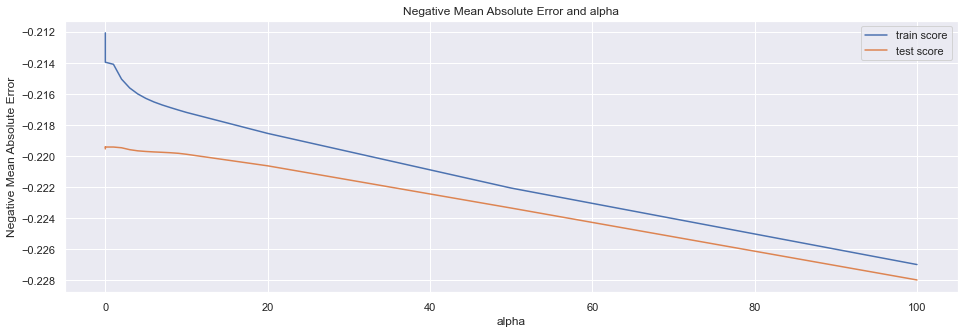

In [249]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [250]:
# ridge model
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 0.        ,  0.21201061,  0.15226751, -0.17614495, -0.53882492,
        0.25842079,  0.29049577, -0.3833085 , -0.34184973, -0.25068195,
       -0.21735581, -1.29725043,  0.19085373])

In [251]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.5389052676943543


In [252]:
# Prediction on test set
X_test_new=X_test[col1]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = ridge.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.45997352278102777


In [253]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.08885601948982047

### Lasso Regression

In [254]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [255]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [256]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.21930402513882674


In [257]:
# lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [258]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.5312628469477864


In [259]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.42936451325027114


In [260]:
mean_squared_error(y_test, y_test_pred)

0.09389242948481814

In [276]:
print(list(zip(lasso.coef_, X_train_new)))

[(0.0, 'const'), (0.20878104805457687, 'TotalBsmtSF'), (0.0, 'MSZoning_FV'), (-0.14172925827335353, 'MSZoning_RM'), (-0.0, 'Condition2_PosN'), (0.0, 'RoofMatl_WdShake'), (0.0, 'RoofMatl_WdShngl'), (-0.0, 'Exterior1st_BrkComm'), (-0.1741287645368133, 'GarageType_No_Garage'), (-0.0, 'GarageCond_Fa'), (-0.0, 'GarageCond_Po'), (-0.0, 'PoolQC_Gd'), (0.07675808692618923, 'SaleType_New')]


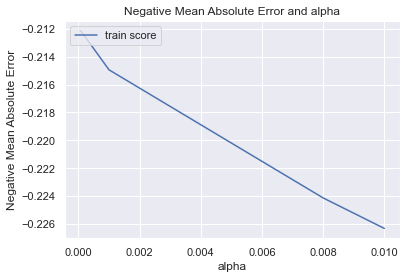

In [262]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [307]:
#Final Ridge model
ridge = Ridge(alpha = 20)
ridge.fit(X_train_new,y_train)

y_pred_train = ridge.predict(X_train_new)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_new)
print(r2_score(y_test,y_pred_test))

0.4928486478958791
0.5102681886787916


In [308]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [309]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
0,MSSubClass,12.049787
2,Street,0.202894
13,1stFlrSF,0.152343
3,OverallQual,0.118198
7,MasVnrArea,0.063616
6,YearRemodAdd,0.054739
1,LotArea,0.000000
5,YearBuilt,-0.047301
11,TotalBsmtSF,-0.052329
8,BsmtFinSF1,-0.056927


In [328]:
#Final Lasso model
lasso = Lasso(alpha=0.02)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.008171038807205933
0.004742707786535516


In [329]:
print(list(zip(lasso.coef_, X_train_new)))

[(0.0, 'const'), (0.0, 'TotalBsmtSF'), (0.0, 'MSZoning_FV'), (0.0, 'MSZoning_RM'), (0.0, 'Condition2_PosN'), (-0.0, 'RoofMatl_WdShake'), (-0.05978562825220955, 'RoofMatl_WdShngl'), (-0.0, 'Exterior1st_BrkComm'), (-0.0, 'GarageType_No_Garage')]


#### After compairing both the model we can see that the below Features are best explaining the DataSet

- MSSubClass
- Street
- 1stFlrSF
- OverallQual
- MasVnrArea
- YearRemodAdd
- LotArea
- TotalBsmtSF
- YearBuilt
- BsmtFinSF1
- OverallCond
- BsmtUnfSF
- CentralAir
- BsmtFinSF2
